# **데이터 전처리**

# **numpy로 데이터 준비하기**

In [1]:
## 도미와 빙어의 길이와 무게 데이터 준비하기
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8,
                12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np
## column_stack() 메소드로 fish_data를 배열로 생성
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:3])
print(np.ones(3))

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]]
[1. 1. 1.]


In [3]:
## numpy ones()메소드와 zeros() 메소드로 0과 1의 숫자 인덱스 생성
## concatenate()메소드를 이용해서 각각의 인덱스를 연결해 하나로 만듦
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


# **사이킷런으로 훈련 세트와 테스트 세트 나누기**

In [4]:
## 사이킷런의 model_selection에 훈련세트와 테스트세트 나누는 train_test_splt() 메소드 사용
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [5]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# **수상한 도미 한마리**

In [11]:
## k-최근접이웃 분류기 생성하고 훈련(fit) 및 테스트(score)
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [12]:
print(kn.predict([[25, 150]]))

[0.]


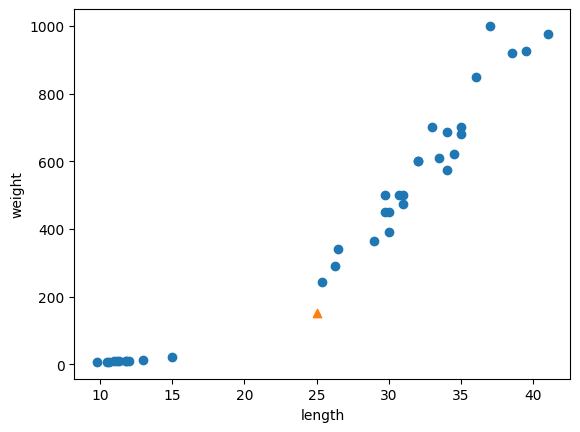

In [13]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

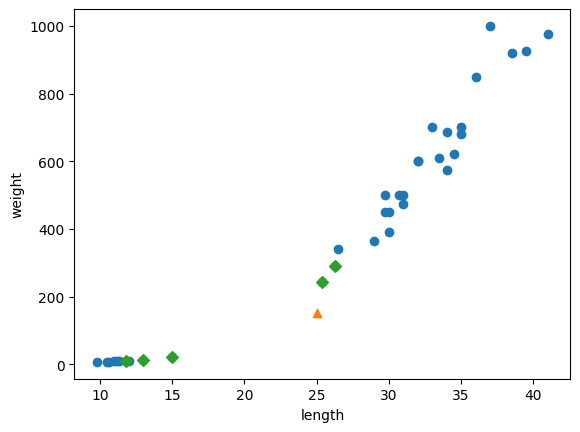

In [15]:
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
print(train_input[indexes])
print(train_target[indexes])
print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]
[[1. 0. 0. 1. 0.]]
[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


# **데이터 기준(표준점수)을 맞춘 전처리 데이터로 모델 훈련하기**
*   x 축 값을 0~1.000 사이로 스케일링 해보기
*   x 축 값을 표준점수로 전처리해서 훈련하기



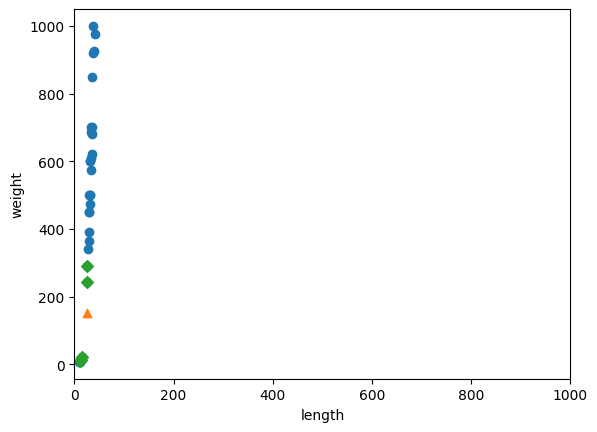

In [17]:
## 길이보다는 무게에 따른 특성차가 크기 때문에 x축의 범위(0~1, 000)를 동일하게 재배치함
## xlim() 메소드는 x축을 기준으로 재배치, ylim()은 y축을 기준으로 재배치

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
## 학습데이터에 대해서 표준점수 구하기: (특성값-평균)/표준편차
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

train_scaled = (train_input - mean) / std

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


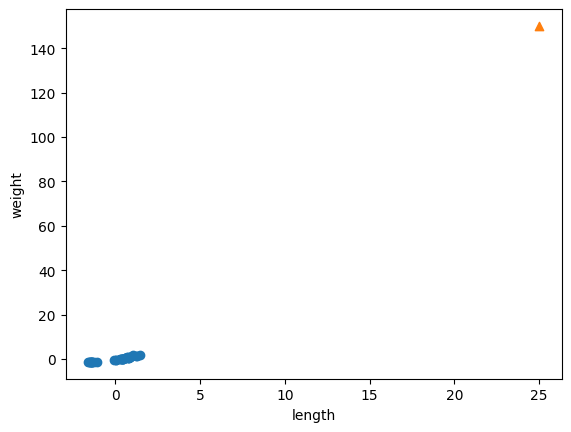

In [21]:
## 길이 20, 무게 150 생선을 표준점수 기준으로 예측 - 도미로 예측
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

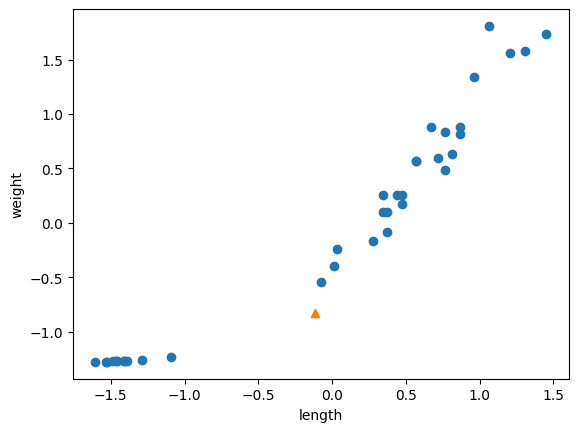

In [25]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [27]:
print(kn.predict([new]))

[1.]


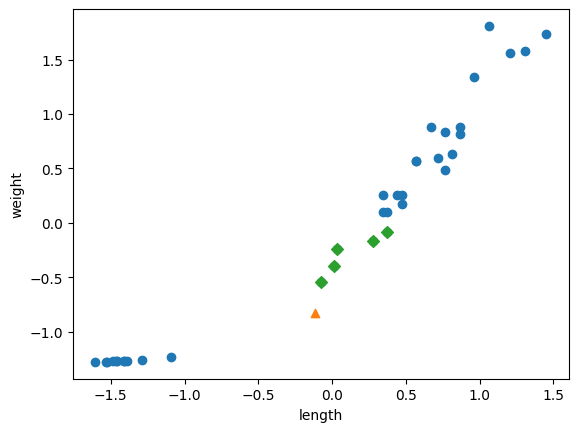

In [28]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# **길이가 20, 무게가 80인 생선 예측하고 근거를 표시하시오**

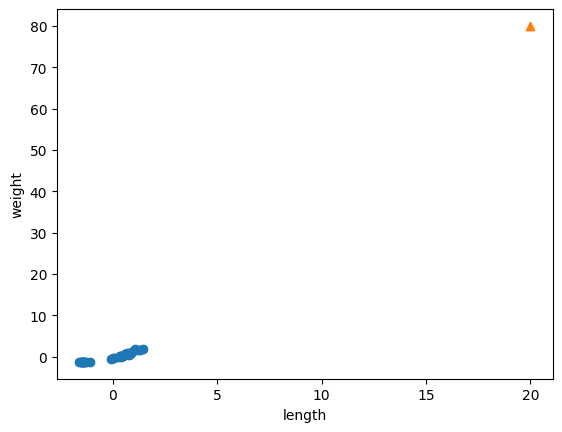

In [34]:
## 길이 20, 무게 80 생선을 표준점수 기준으로 예측 - 도미로 예측
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(20, 80, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

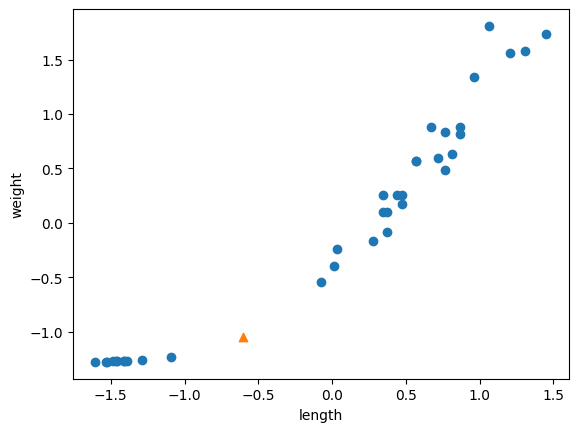

In [35]:
new = ([20, 80] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [36]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [37]:
print(kn.predict([new]))

[0.]


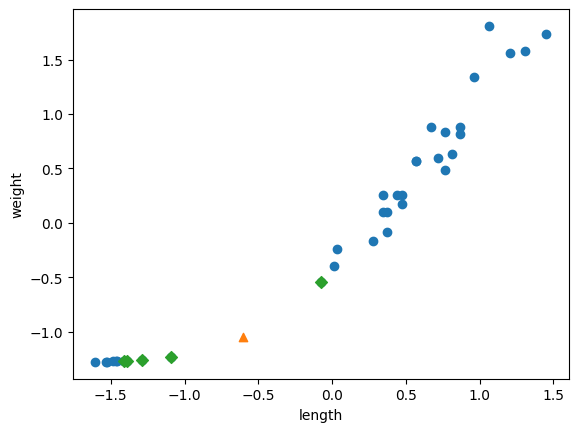

In [38]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# **응용예제**
도미와 다른 물고기 종류에 대해서 훈련세트와 평가세트를 임의로 선택하여 전처리(표준점수 기반)한 후 학습하는 머신러닝 예제를 작성하시오.



In [39]:
## 도미랑 농어

fishlength = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 8.4, 13.7, 15, 16.2 ,17.4, 18, 18.7, 19, 19.6, 20, 21, 21, 21, 21.3]
fishweight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 5.9 , 32, 40, 51.5, 70, 100, 78, 80, 85, 85, 110, 115, 125, 130]

In [41]:
import numpy as np

fishdata = np.column_stack((fishlength, fishweight))
print(fishdata[:3])
print(np.ones(3))

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]]
[1. 1. 1.]


In [43]:
fishtarget = np.concatenate((np.ones(35), np.zeros(14)))
print(fishtarget)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [44]:
traininput, testinput, traintarget, testtarget = train_test_split(fishdata, fishtarget, random_state=42)

In [45]:
print(traininput.shape, testinput.shape)
print(traintarget.shape, testtarget.shape)
print(testtarget)

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [46]:
print(testtarget)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [47]:
kn.fit(traininput, traintarget)
kn.score(testinput, testtarget)

1.0

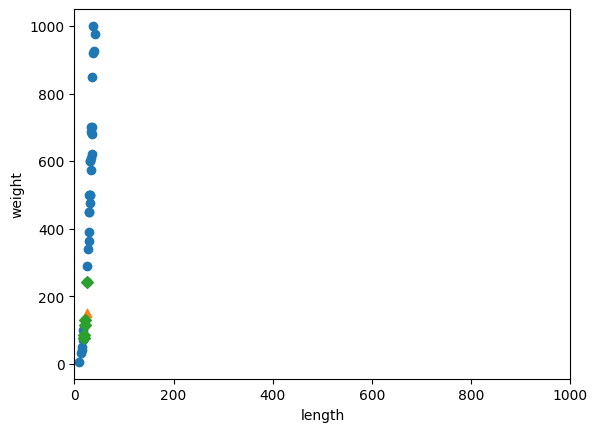

In [51]:
plt.scatter(traininput[:, 0], traininput[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(traininput[indexes, 0], traininput[indexes, 1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [52]:
mean = np.mean(traininput, axis=0)
std = np.std(traininput, axis=0)
print(mean, std)

trainscaled = (traininput - mean) / std

[ 27.85       436.87222222] [  8.07662952 298.87933612]


In [53]:
print(kn.predict([new]))

[0.]


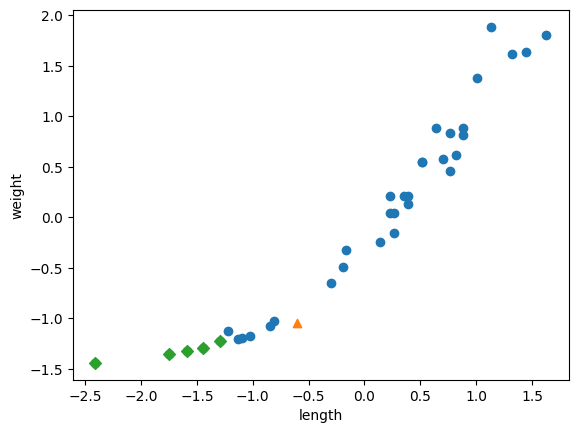

In [54]:
distances, indexes = kn.kneighbors([new])
plt.scatter(trainscaled[:,0], trainscaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(trainscaled[indexes,0], trainscaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()